<a href="https://colab.research.google.com/github/meltemtugran/udemy-kurs-notlar-/blob/main/vahitk_udemy_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pivot tablo nasıl yazılır 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.pivot_table("target",index="age",columns="cp")

cp,0,1,2,3
age,,,,
29,NaN,1.000000,NaN,NaN
34,NaN,1.000000,NaN,1.00
35,0.333333,1.000000,NaN,NaN
37,NaN,NaN,1.000000,NaN
38,NaN,NaN,1.000000,0.00
39,0.000000,NaN,1.000000,NaN
40,0.000000,NaN,NaN,1.00
41,0.000000,1.000000,1.000000,NaN
42,0.666667,1.000000,1.000000,1.00


sürekli değşkeni yani nümerik değerleri kategorik değişkenler nasıl böleriz:

In [ ]:
age=pd.cut(data["age"],[0,18,90])
age.head(10)

0    (18, 90]
1    (18, 90]
2    (18, 90]
3    (18, 90]
4    (18, 90]
5    (18, 90]
6    (18, 90]
7    (18, 90]
8    (18, 90]
9    (18, 90]
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 90]]

In [ ]:
data.pivot_table("target",["sex",age],"cp")

,cp,0,1,2,3
sex,age,,,,
0,"(18, 90]",0.461538,0.888889,0.971429,1.000000
1,"(18, 90]",0.201923,0.781250,0.673077,0.631579


#bölüm 6: keşifçi veri analzi ve görselleştrme 

In [ ]:
df = pd.read_csv('heart.csv')


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#eksik gözlem var mı?
df.isnull().values.any()

False

In [ ]:
#veri tesinde nerde kaç tane nan değr var?
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

varsayalım ki cp sütünda boş değerler var biz de onu doldurmka için boş yerlere 0 yazmak istiyoruz.Bu kodu çalıştır:



In [ ]:
#df["cp"].fillna(0, inplace=True)

In [ ]:
# 0 ile değil cp nin  ortalama değeri ile doldurulsun çünkü 0 dersek çok şey değişir:
#df["cp"].fillna(df.cp.mean(), inplace=True)


In [ ]:
#cp falan dite tek tek belirtmek yerine verisetindeki tüm boş değerler veri setinin ortalama değerini koymak istiyorsan:

#df.fillna(df.mean(), inplace = True)

veri setinde nan yani boş değerler varsa ne yapacağız:iki yöntem var :

1- boş değer olan satırı silerisin:

2-boş değerleri doldurursun:

varsayalım boş değerleri olan satırı kaldır gitsin bu kodu çalıtır:

In [ ]:
#datasetinadı.dropna(axis=0,inplace=True)

#print(datasetinadı)

## grafikleştirme -görselleştirme

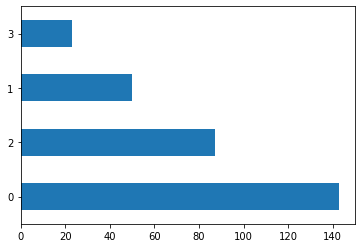

In [ ]:
df["cp"].value_counts().plot.barh();

Text(0.5, 1.0, 'cp niteliklerinin frekansları')

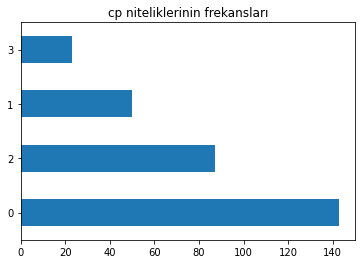

In [ ]:
df["cp"].value_counts().plot.barh().set_title("cp niteliklerinin frekansları")

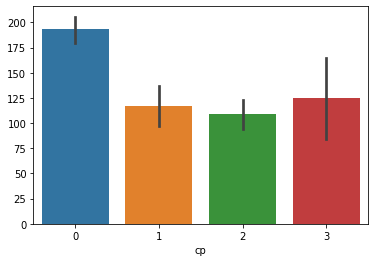

In [ ]:
#yuardaki grafiği yapmanın bir diğer şekli ama daha afilli:
sns.barplot(x="cp",y=df.cp.index, data=df)

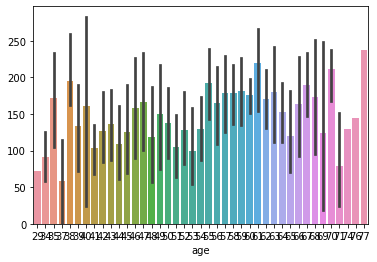

In [ ]:
sns.barplot(x="age",y=df.age.index, data=df)
#sürekli değişkenler sütun grafiği güzel olmaz

peki gbir kategorik değişkenli(cp gibi) bir de sürekli değişkenin(age) grafiği nasıl yapılır ?:

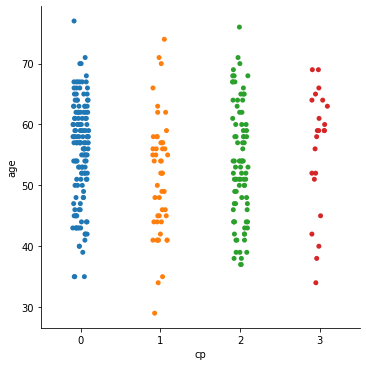

In [ ]:
sns.catplot(x="cp",y="age", data=df)

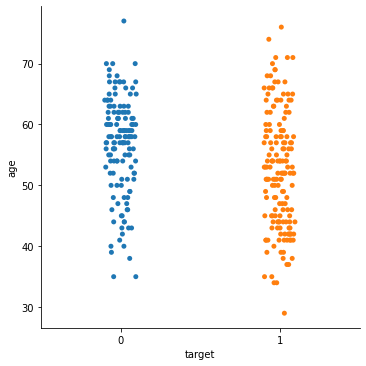

In [ ]:
sns.catplot(x="target",y="age", data=df)

In [ ]:
#3 değişkenli yaparsak: ama çalışmoyor
#sns.barplot(x="cp",y="target", hue="color", data=df);

#grafik çeşitleri ile devam ediyor oldukça uzun ihtiycın oldukça bak.

##İSTATİSTİĞE geçiyorum.